<a href="https://colab.research.google.com/github/venkat2ram/Keras-and-Tensorflow/blob/master/ud_l5_cnn_dogs_v_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D
from tensorflow.nn import relu,softmax
from __future__ import absolute_import,print_function,division
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from matplotlib import pyplot as plt
import numpy as np


In [5]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir=tf.keras.utils.get_file('cats_and_dogs_filterted.zip',origin=_URL,extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [13]:
zip_dir_name=os.path.dirname(zip_dir)
!find $zip_dir_name -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [17]:
num_cats_tr=len(os.listdir('/root/.keras/datasets/cats_and_dogs_filtered/train/cats'))
num_dogs_tr=len(os.listdir('/root/.keras/datasets/cats_and_dogs_filtered/train/dogs'))
num_cats_val=len(os.listdir('/root/.keras/datasets/cats_and_dogs_filtered/validation/cats'))
num_dogs_val=len(os.listdir('/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs'))

In [18]:
print('number of cat examples in train dataset: {}'.format(num_cats_tr))
print('number of dog examples in train dataset: {}'.format(num_dogs_tr))
print('number of cat examples in validation dataset: {}'.format(num_cats_val))
print('number of dog examples in validation dataset: {}'.format(num_dogs_val))

number of cat examples in train dataset: 1000
number of dog examples in train dataset: 1000
number of cat examples in validation dataset: 500
number of dog examples in validation dataset: 500


In [19]:
BATCH_SIZE=100
IMG_SHAPE=150

In [20]:
train_image_generator=ImageDataGenerator(rescale=1./255)
validation_image_generator=ImageDataGenerator(rescale=1./255)

In [26]:
train_data_gen=train_image_generator.flow_from_directory('/root/.keras/datasets/cats_and_dogs_filtered/train/',
                                                         target_size=(IMG_SHAPE,IMG_SHAPE),
                                                         batch_size=BATCH_SIZE,
                                                         shuffle=True,
                                                         class_mode='binary'                                                      
                                                         )
validation_data_gen=train_image_generator.flow_from_directory('/root/.keras/datasets/cats_and_dogs_filtered/validation/',
                                                         target_size=(IMG_SHAPE,IMG_SHAPE),
                                                         batch_size=BATCH_SIZE,
                                                         shuffle=False,
                                                         class_mode='binary'                                                         
                                                         )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [34]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [36]:
sample_training_images,_=train_data_gen.next()

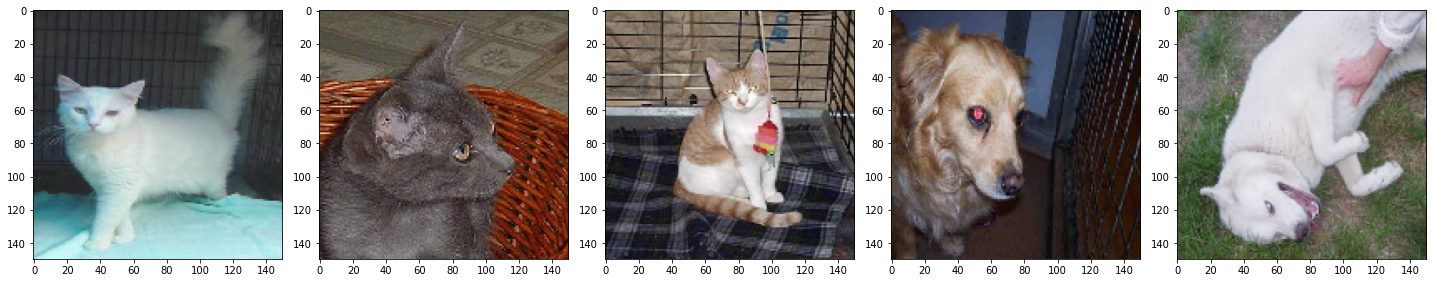

In [37]:
plotImages(sample_training_images[:5])

In [44]:
model=tf.keras.Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                           MaxPooling2D((2,2)),

                           Conv2D(64,(3,3),activation='relu'),
                           MaxPooling2D((2,2)),

                           Conv2D(128,(3,3),activation='relu'),
                           MaxPooling2D((2,2)),

                           Conv2D(128,(3,3),activation='relu'),
                           MaxPooling2D((2,2)),

                           Flatten(),
                           Dense(512,activation='relu'),
                           Dense(2,activation='softmax')])

In [45]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [46]:
model.fit_generator(train_data_gen,
                    steps_per_epoch=int(np.ceil((num_dogs_tr+num_cats_tr)/BATCH_SIZE)),
                    epochs=100,
                    validation_data=validation_data_gen,
                    validation_steps=int(np.ceil((num_dogs_val+num_cats_val)/BATCH_SIZE)))

Epoch 1/100
20/20 [==============================] - 9s 429ms/step - loss: 0.7418 - accuracy: 0.4855 - val_loss: 0.6922 - val_accuracy: 0.5250
Epoch 2/100
20/20 [==============================] - 9s 429ms/step - loss: 0.6902 - accuracy: 0.5450 - val_loss: 0.6880 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 9s 429ms/step - loss: 0.6887 - accuracy: 0.5280 - val_loss: 0.6823 - val_accuracy: 0.6480
Epoch 4/100
20/20 [==============================] - 9s 427ms/step - loss: 0.6877 - accuracy: 0.5270 - val_loss: 0.6775 - val_accuracy: 0.5860
Epoch 5/100
20/20 [==============================] - 9s 427ms/step - loss: 0.6468 - accuracy: 0.6360 - val_loss: 0.6171 - val_accuracy: 0.6590
Epoch 6/100
20/20 [==============================] - 9s 427ms/step - loss: 0.6132 - accuracy: 0.6635 - val_loss: 0.6434 - val_accuracy: 0.6380
Epoch 7/100
20/20 [==============================] - 8s 424ms/step - loss: 0.5909 - accuracy: 0.6745 - val_loss: 0.6062 - val_accuracy: 0.6600